# Analisis de campo 'gimnasio'

## Imports

In [201]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import common.common_pandas_lib as common

## Configuraciones

### Configuraciones librerias graficas y plots

In [202]:
COLORES_BARRAS = 'colorblind'
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
sns.set_palette(COLORES_BARRAS)
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

## Carga optimizada del set de datos 

In [203]:
zona_prop = common.cargar_train_optimizado('train.csv')

## Gimnasio

## ¿Que valores toma gimnasio?

In [204]:
zona_prop['gimnasio'].unique()

array([False,  True])

## ¿Cuantos datos del set tienen gimansio limpio?

In [205]:
zona_prop['gimnasio'].isnull().sum()

0

No necesitamos descartar ningun dato, en ppio.

In [206]:
zona_gimnasio = zona_prop.copy() # Para poder realizar modifcaciones sin que pandas se queje

## Gimnasio - Antiguedad 

## Gimnasio - Fecha

### ¿Cuantos datos perdemos al descartar fechas NaN?

In [207]:
zona_gimnasio['fecha'].isnull().sum()

0

No perdemos ningun dato.

### ¿Como evoluciono el porcentaje de propiedades, en Mexico, segun la presencia de gimnasio con el pasar de los años?

In [208]:
zona_gimnasio['anio'] = zona_gimnasio['fecha'].dt.year
zona_gimnasio

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,nan,nan,2015-08-23,False,False,False,False,False,"2,273,000.00",2015
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,19.31,-99.23,2013-06-28,False,False,False,True,True,"3,600,000.00",2013
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,nan,nan,2015-10-17,False,False,False,False,False,"1,200,000.00",2015
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,19.30,-99.69,2012-03-09,False,False,False,True,True,"650,000.00",2012
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,nan,nan,2016-06-07,False,False,False,False,False,"1,150,000.00",2016
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,...,19.30,-99.15,2014-03-18,False,False,False,False,True,"1,100,000.00",2014
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,...,17.14,-96.80,2016-02-23,False,False,False,False,False,"1,150,000.00",2016
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.00,4.00,2.00,...,20.67,-87.04,2016-10-20,False,False,False,False,False,"4,200,000.00",2016
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,...,nan,nan,2014-01-06,False,False,False,True,True,"310,000.00",2014
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,nan,nan,nan,...,19.32,-98.89,2016-12-22,False,False,False,False,False,"6,200,000.00",2016


In [209]:
anio_agrupado_gimnasio_porcentaje = common.agrupar_calcular_porcentajes_desagrupar(zona_gimnasio, 'anio', 'gimnasio')
anio_agrupado_gimnasio_porcentaje.columns = ['anio', 'tiene_gimnasio', 'porcentaje_propiedades']
anio_agrupado_gimnasio_porcentaje

,anio,tiene_gimnasio,porcentaje_propiedades
0,2012,False,95.76
1,2012,True,4.24
2,2013,False,95.63
3,2013,True,4.37
4,2014,False,95.23
5,2014,True,4.77
6,2015,False,95.25
7,2015,True,4.75
8,2016,False,91.19
9,2016,True,8.81


In [210]:
anio_gimnasio_porcentaje_para_plot = common.columna_bool_a_si_no(
                                            anio_agrupado_gimnasio_porcentaje,
                                            'tiene_gimnasio'
                                        )
anio_gimnasio_porcentaje_para_plot                                                                               

,anio,tiene_gimnasio,porcentaje_propiedades
0,2012,No,95.76
1,2012,Si,4.24
2,2013,No,95.63
3,2013,Si,4.37
4,2014,No,95.23
5,2014,Si,4.77
6,2015,No,95.25
7,2015,Si,4.75
8,2016,No,91.19
9,2016,Si,8.81


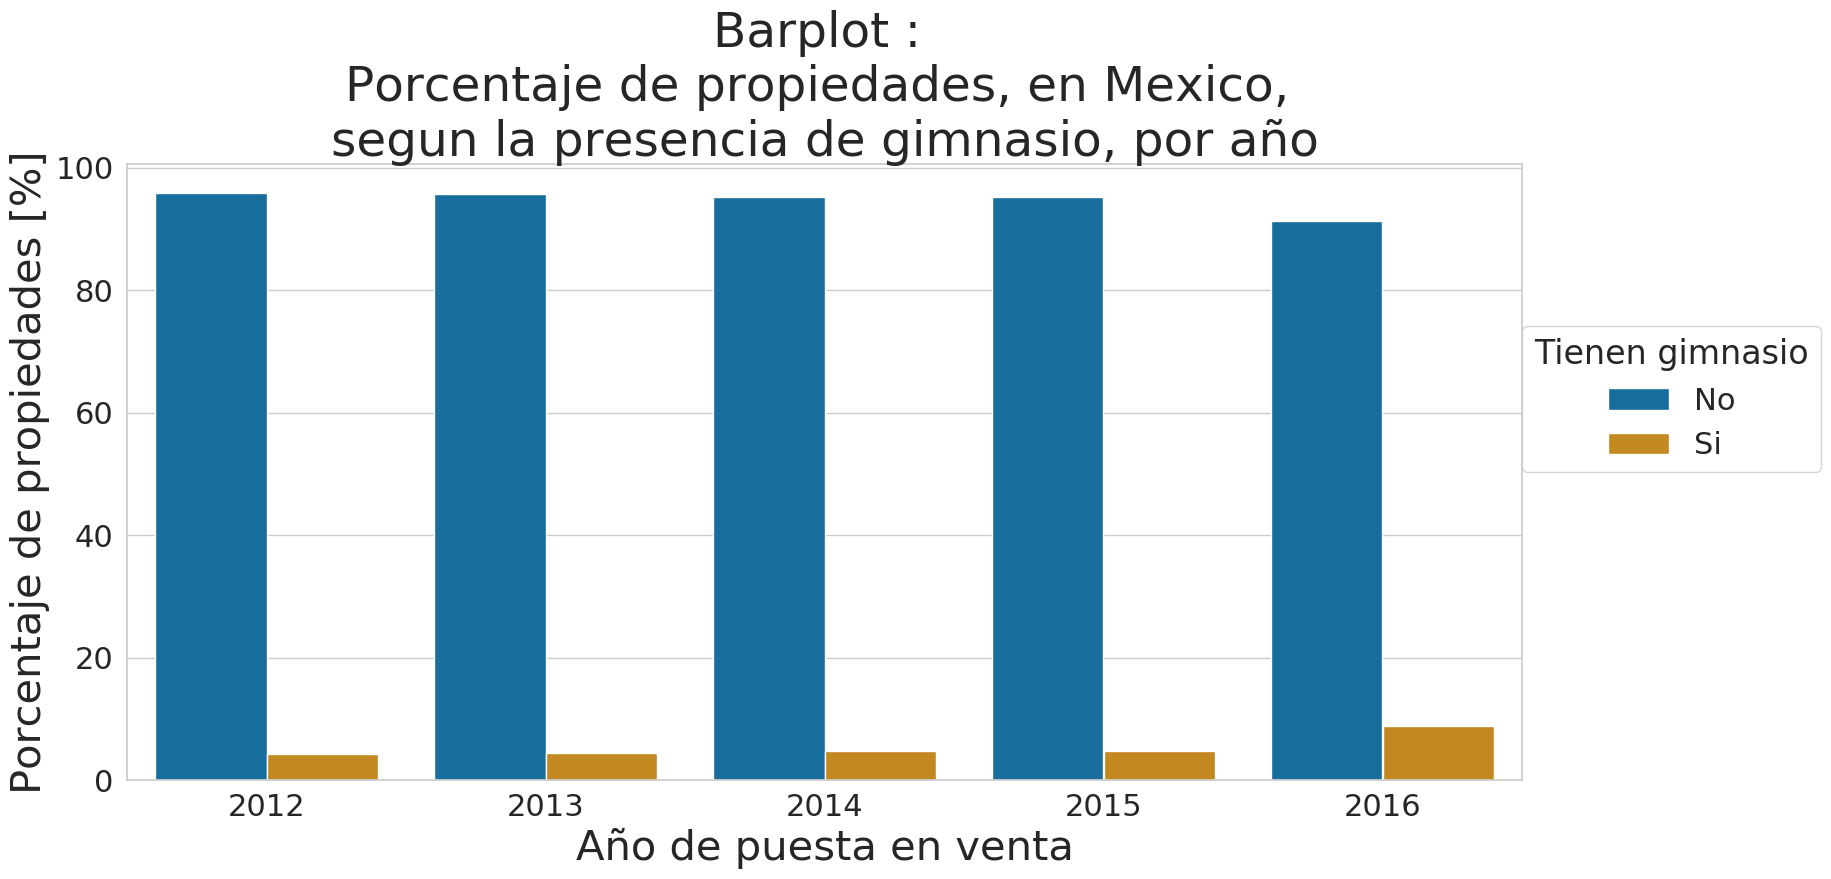

In [211]:
plot_barplot_gimnasio_anio_porc = sns.barplot(
                                    x = 'anio',
                                    y = 'porcentaje_propiedades',
                                    hue = 'tiene_gimnasio',
                                    data = anio_gimnasio_porcentaje_para_plot
                                )

common.setear_titulos_plot(
    plot_barplot_gimnasio_anio_porc,
    'Barplot : \nPorcentaje de propiedades, en Mexico, \nsegun la presencia de gimnasio, por año',
    'Año de puesta en venta',
    'Porcentaje de propiedades [%]'
)

plot_barplot_gimnasio_anio_porc.legend(title = 'Tienen gimnasio', loc = [1,0.5])
plt.show()

Vemos que el porcentaje de propiedades con gimnasio es bastante bajo.  
Este porcentaje parece mantenerse constante entre 2012 y 2015, y tiene un leve aumento en el 2016.

In [212]:
anio_gimnasio_porcentaje_pivot = anio_gimnasio_porcentaje_para_plot.pivot_table(index = 'tiene_gimnasio', columns = 'anio', values = 'porcentaje_propiedades')
anio_gimnasio_porcentaje_pivot_apilados = anio_gimnasio_porcentaje_pivot.cumsum()
anio_gimnasio_porcentaje_pivot_apilados

anio,2012,2013,2014,2015,2016
tiene_gimnasio,,,,,
No,95.76,95.63,95.23,95.25,91.19
Si,100.00,100.00,100.00,100.00,100.00


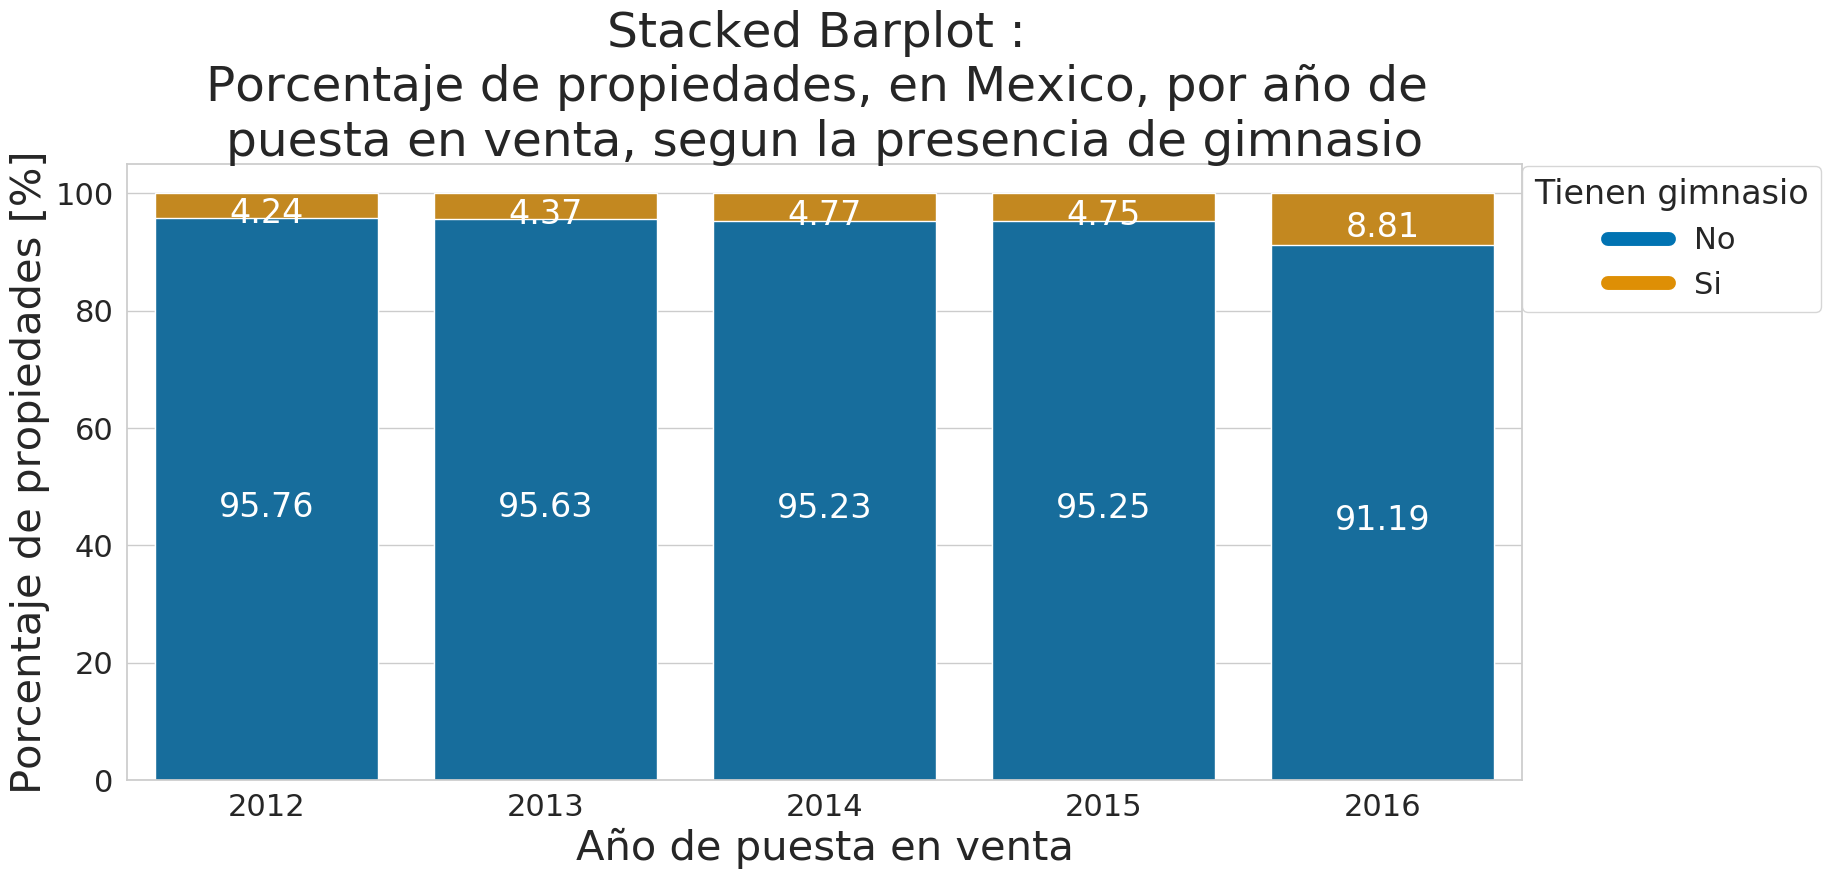

In [213]:
varios_plots_apilados_anio_gimnasio_porcentaje = common.plot_stacked_barplot(
                                                        anio_gimnasio_porcentaje_pivot_apilados,
                                                        'Tienen gimnasio',
                                                        1, 0.76
                                                    )
# Titulos
common.setear_titulos_plot(
    varios_plots_apilados_anio_gimnasio_porcentaje[-1],
    'Stacked Barplot : \nPorcentaje de propiedades, en Mexico, por año de \npuesta en venta, segun la presencia de gimnasio',
    'Año de puesta en venta',
    'Porcentaje de propiedades [%]'
)

# Porcentajes
common.agregar_valores_stacked_barplot(
    varios_plots_apilados_anio_gimnasio_porcentaje,
    anio_gimnasio_porcentaje_pivot_apilados,
    'w',
    0,-3
)

plt.show()

## Gimnasio - Usosmultiples

### ¿Cuantos datos perdemos por descartar usosmultiples NaN?

In [214]:
zona_gimnasio['usosmultiples'].isnull().sum()

0

No perdemos ningun dato.

### ¿Que es usosmultiples?

In [215]:
zona_gimnasio['usosmultiples'].unique()

array([False,  True])

### ¿Como se relaciona la presencia de gimnasio con la presencia de usosmutiples?

In [216]:
gimnasio_usosmultiples_agrupados_cant = zona_gimnasio.groupby(['gimnasio', 'usosmultiples']).agg({'gimnasio' : 'count'})
gimnasio_usosmultiples_agrupados_cant.columns = ['cantidad_propiedades']
gimnasio_usosmultiples_agrupados_cant.reset_index(inplace = True)
gimnasio_usosmultiples_agrupados_cant.columns = ['tiene_gimnasio', 'tiene_usosmultiples', 'cantidad_propiedades']
gimnasio_usosmultiples_pivot_cant = gimnasio_usosmultiples_agrupados_cant.pivot_table(index = 'tiene_gimnasio', columns = 'tiene_usosmultiples', values = 'cantidad_propiedades')
gimnasio_usosmultiples_pivot_cant

tiene_usosmultiples,False,True
tiene_gimnasio,,
False,218121,6885
True,8657,6337


In [217]:
gimnasio_usosmultiples_pivot_cant_para_plot = gimnasio_usosmultiples_pivot_cant.copy()
gimnasio_usosmultiples_pivot_cant_para_plot.columns = ['No', 'Si']
gimnasio_usosmultiples_pivot_cant_para_plot.columns.name = 'tiene_usosmultiples'
gimnasio_usosmultiples_pivot_cant_para_plot.index = ['No', 'Si']
gimnasio_usosmultiples_pivot_cant_para_plot.index.name = 'tiene_gimnasio'
gimnasio_usosmultiples_pivot_cant_para_plot

tiene_usosmultiples,No,Si
tiene_gimnasio,,
No,218121,6885
Si,8657,6337


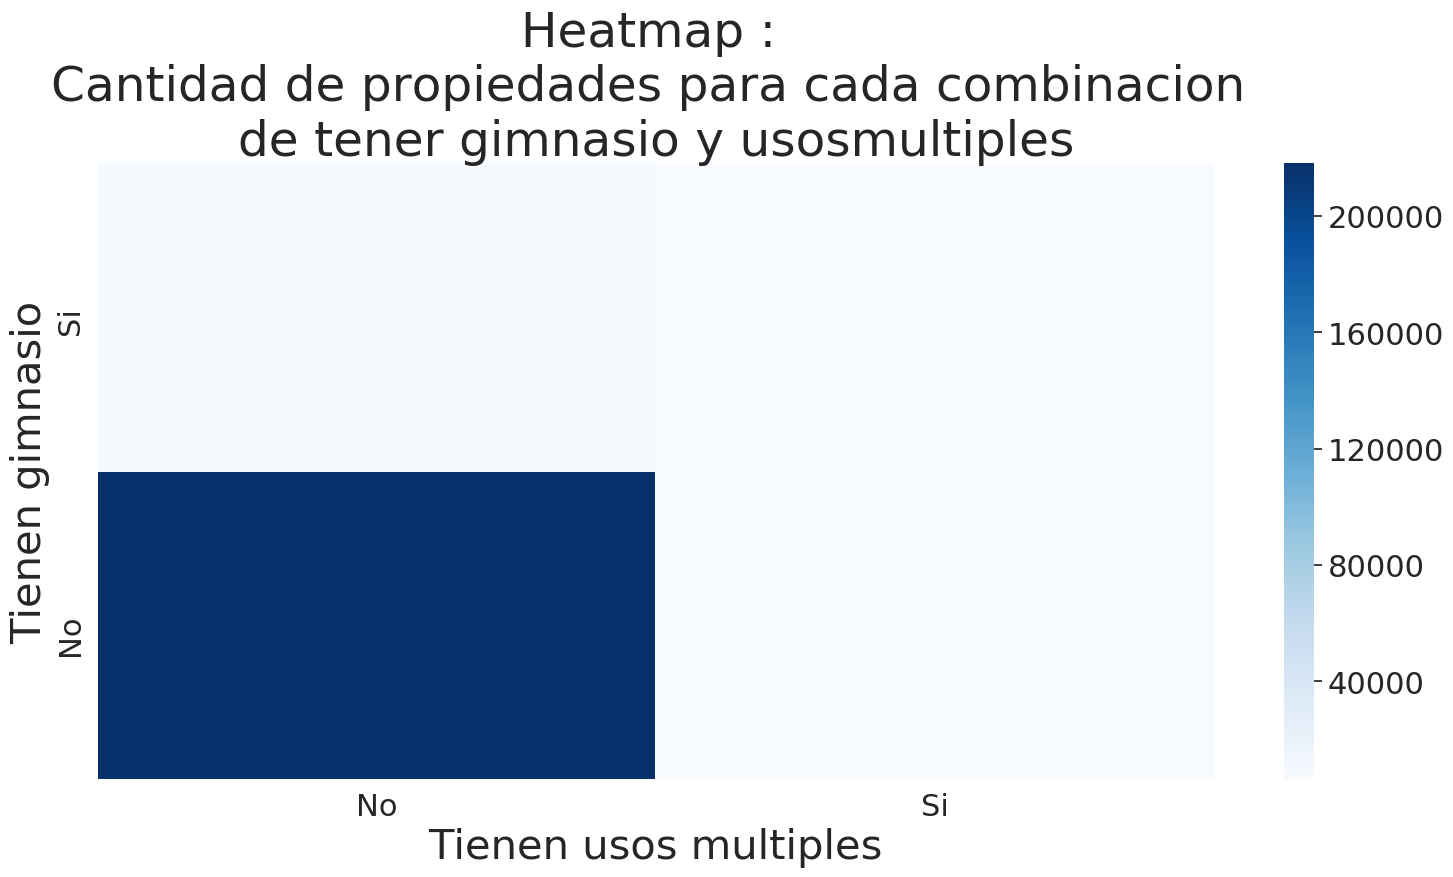

In [218]:
plot_heatmap_gimnasio_usosmultiples_cant = sns.heatmap(gimnasio_usosmultiples_pivot_cant_para_plot, cmap = 'Blues')
plot_heatmap_gimnasio_usosmultiples_cant.invert_yaxis()

common.setear_titulos_plot(
    plot_heatmap_gimnasio_usosmultiples_cant,
    'Heatmap : \nCantidad de propiedades para cada combinacion \nde tener gimnasio y usosmultiples',
    'Tienen usos multiples',
    'Tienen gimnasio'
)

plt.show()

El mapa de calor no muestra una alta concentracion de propiedades que no tienen ni gimnasio ni usos multiples

In [219]:
gimnasio_usosmultiples_agrupados_cant

,tiene_gimnasio,tiene_usosmultiples,cantidad_propiedades
0,False,False,218121
1,False,True,6885
2,True,False,8657
3,True,True,6337


In [220]:
gimnasio_usosmultiples_cant_para_plot = gimnasio_usosmultiples_agrupados_cant.copy()
gimnasio_usosmultiples_cant_para_plot = common.columna_bool_a_si_no(gimnasio_usosmultiples_cant_para_plot, 'tiene_gimnasio')
gimnasio_usosmultiples_cant_para_plot = common.columna_bool_a_si_no(gimnasio_usosmultiples_cant_para_plot, 'tiene_usosmultiples')
gimnasio_usosmultiples_cant_para_plot

,tiene_gimnasio,tiene_usosmultiples,cantidad_propiedades
0,No,No,218121
1,No,Si,6885
2,Si,No,8657
3,Si,Si,6337


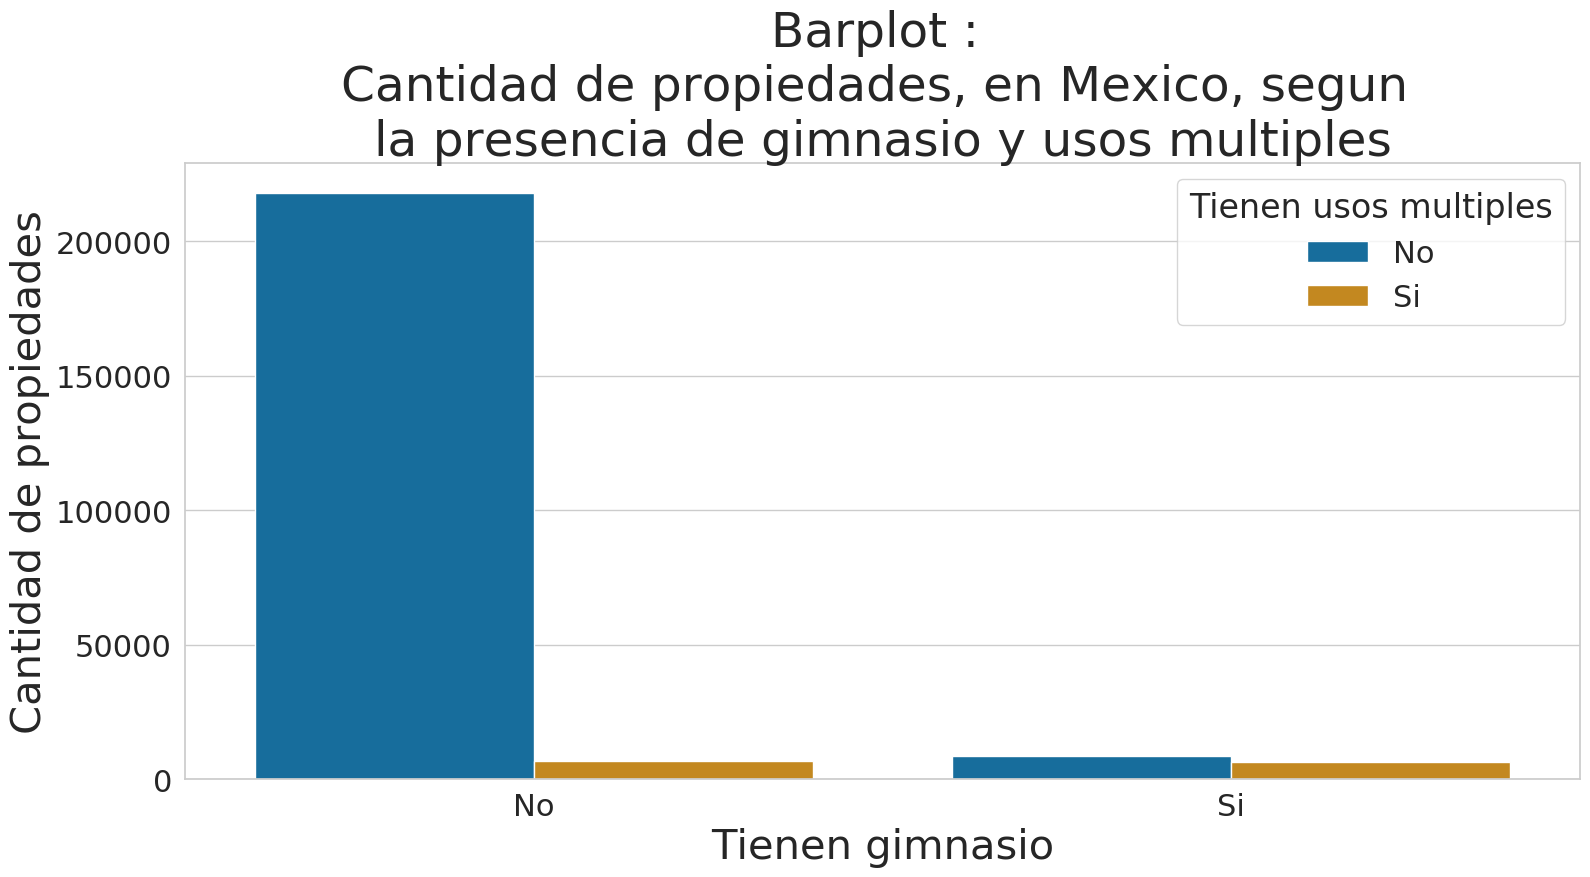

In [221]:
plot_barplot_gimnasio_usosmultiples_cant = sns.barplot(
                                            x = 'tiene_gimnasio',
                                            y = 'cantidad_propiedades',
                                            hue = 'tiene_usosmultiples',
                                            data = gimnasio_usosmultiples_cant_para_plot
                                        )

common.setear_titulos_plot(
    plot_barplot_gimnasio_usosmultiples_cant,
    'Barplot : \nCantidad de propiedades, en Mexico, segun \nla presencia de gimnasio y usos multiples',
    'Tienen gimnasio',
    'Cantidad de propiedades'
)

plot_barplot_gimnasio_usosmultiples_cant.legend(title = 'Tienen usos multiples')
plt.show()

Vemos que la mayoria de las propiedades no tienen ni gimnasio ni usos multiples

## Gimnasio - Piscina

### ¿Cuantos datos perdemos si descartamos piscina NaN?

In [222]:
zona_gimnasio['piscina'].isnull().sum()

0

No perdemos ningun dato.

### ¿Que es piscina?

In [223]:
zona_gimnasio['piscina'].unique()

array([False,  True])

### ¿Cuantas propiedades en Mexico tienen gimnasio y piscina?

In [224]:
gimnasio_piscina_agrupados_cant = zona_gimnasio.groupby(['gimnasio', 'piscina']).agg({'gimnasio' : 'count'})
gimnasio_piscina_agrupados_cant.columns = ['cantidad_propiedades']
gimnasio_piscina_agrupados_cant.reset_index(inplace = True)
gimnasio_piscina_agrupados_cant.columns = ['tiene_gimnasio', 'tiene_piscina', 'cantidad_propiedades']
gimnasio_piscina_agrupados_cant

,tiene_gimnasio,tiene_piscina,cantidad_propiedades
0,False,False,211400
1,False,True,13606
2,True,False,7628
3,True,True,7366


In [225]:
gimnasio_piscina_cant_para_plot = gimnasio_piscina_agrupados_cant.copy()
gimnasio_piscina_cant_para_plot = common.columna_bool_a_si_no(gimnasio_piscina_cant_para_plot, 'tiene_gimnasio')
gimnasio_piscina_cant_para_plot = common.columna_bool_a_si_no(gimnasio_piscina_cant_para_plot, 'tiene_piscina')
gimnasio_piscina_cant_para_plot

,tiene_gimnasio,tiene_piscina,cantidad_propiedades
0,No,No,211400
1,No,Si,13606
2,Si,No,7628
3,Si,Si,7366


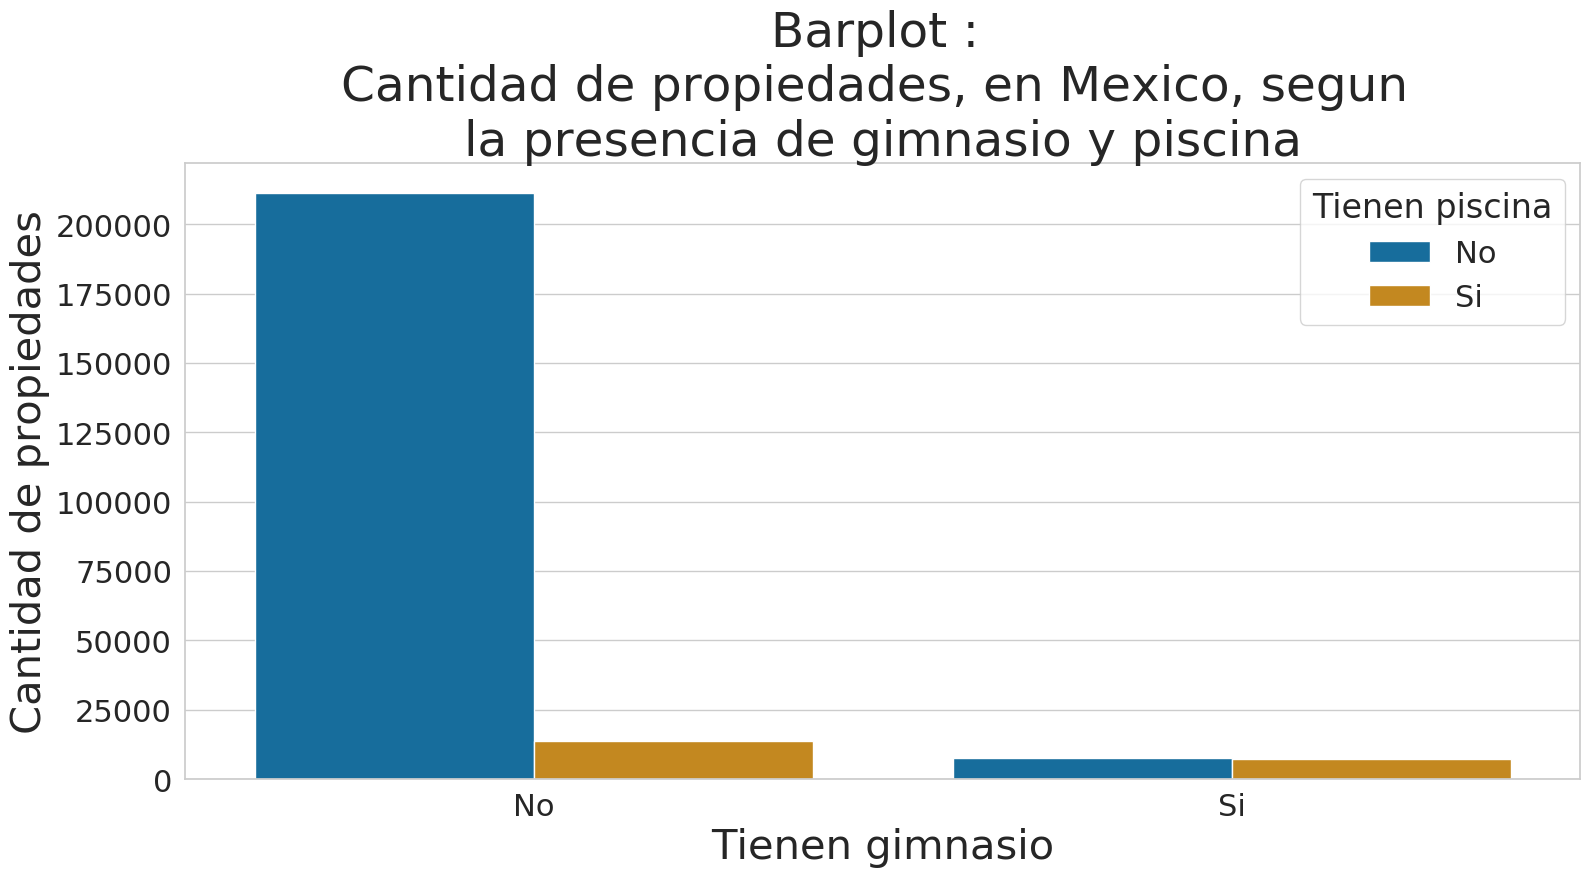

In [226]:
plot_barplot_gimnasio_piscina_cant = sns.barplot(
                                        x = 'tiene_gimnasio',
                                        y = 'cantidad_propiedades',
                                        hue = 'tiene_piscina',
                                        data = gimnasio_piscina_cant_para_plot
                                    )

common.setear_titulos_plot(
    plot_barplot_gimnasio_piscina_cant,
    'Barplot : \nCantidad de propiedades, en Mexico, segun \nla presencia de gimnasio y piscina',
    'Tienen gimnasio',
    'Cantidad de propiedades'
)

plot_barplot_gimnasio_piscina_cant.legend(title = 'Tienen piscina')
plt.show()

A ojo !, vemos que NO tiene gimnasio es mas probable que no tenga piscina; en caso contrario, ya no podriamos afirmar lo mismo con tanta precision

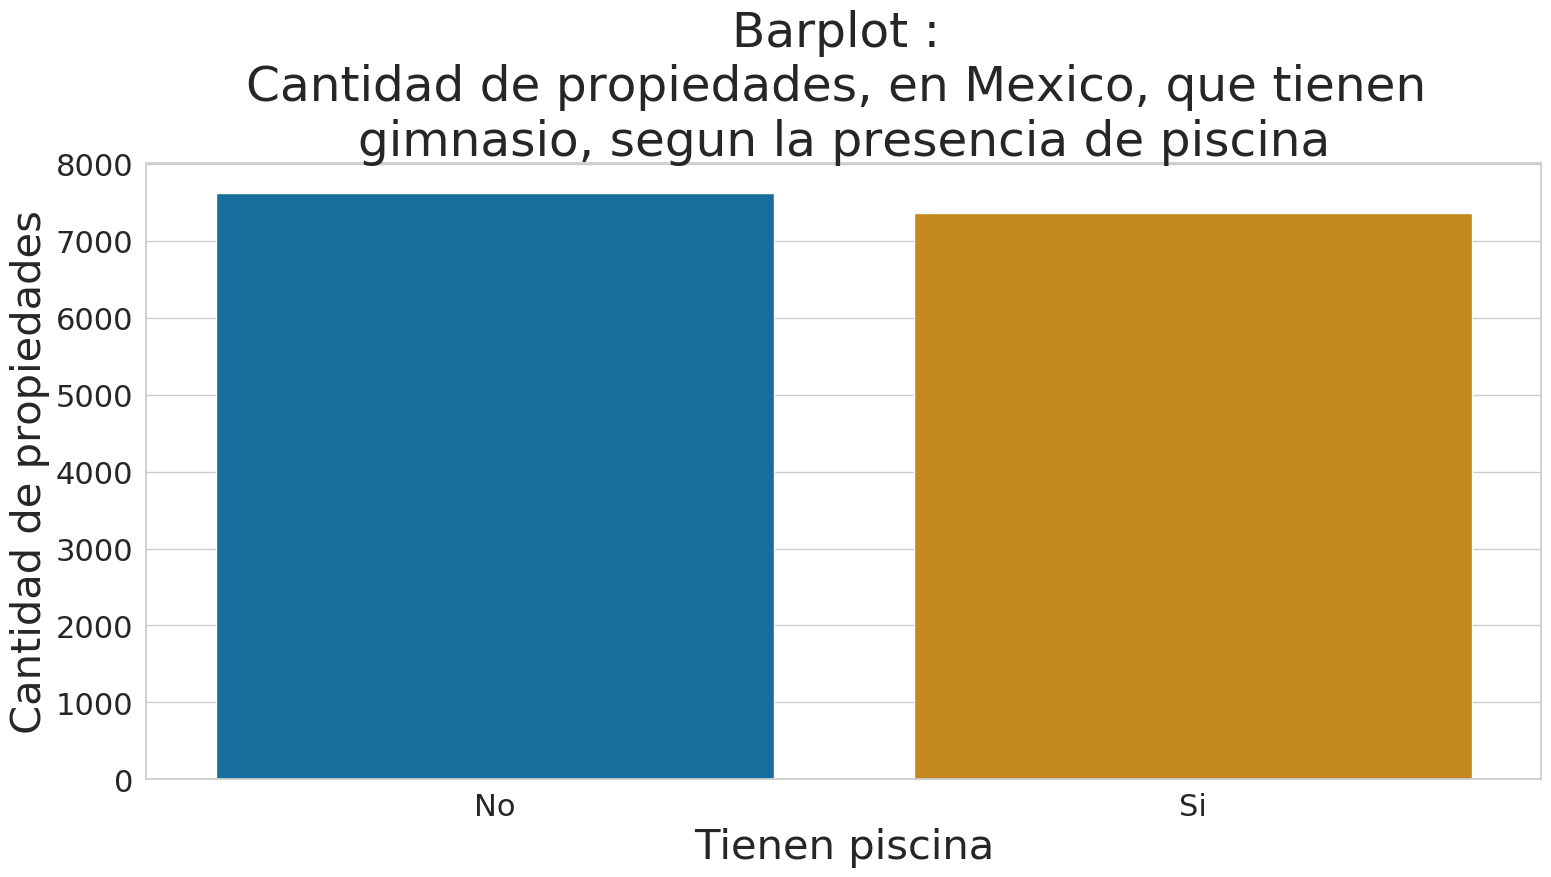

In [227]:
plot_barplot_gimnasio_true_piscina_cant = sns.barplot(
                                            x = 'tiene_piscina',
                                            y = 'cantidad_propiedades',
                                            data = gimnasio_piscina_cant_para_plot.loc[gimnasio_piscina_cant_para_plot['tiene_gimnasio'] == 'Si']
)

common.setear_titulos_plot(
    plot_barplot_gimnasio_true_piscina_cant,
    'Barplot : \nCantidad de propiedades, en Mexico, que tienen \ngimnasio, segun la presencia de piscina',
    'Tienen piscina',
    'Cantidad de propiedades'
)

plt.show()

Con este acercamiento a las propiedades que tienen gimnasio, estamos seguros de que no podemos estar seguros, si tambien tienen piscina o no.

## Gimnasio - Escuelascercanas

### ¿Cuantos datos perdemos si descartamos escuelascercanas NaN? 

In [228]:
zona_gimnasio['escuelascercanas'].isnull().sum()

0

No perdemos ningun dato.

### ¿Que es escuelascercanas?

In [229]:
zona_gimnasio['escuelascercanas'].unique()

array([False,  True])

## ¿Cuantas propiedades, en Mexico, pueden tener gimnasio y escuelascercanas?

In [230]:
gimnasio_escuelascercanas_agrupados_cant = zona_gimnasio.groupby(['gimnasio', 'escuelascercanas']).agg({'gimnasio' : 'count'})
gimnasio_escuelascercanas_agrupados_cant.columns = ['cantidad_propiedades']
gimnasio_escuelascercanas_agrupados_cant.reset_index(inplace = True)
gimnasio_escuelascercanas_agrupados_cant.columns = ['tiene_gimnasio', 'tiene_escuelascercanas', 'cantidad_propiedades']
gimnasio_escuelascercanas_agrupados_cant

,tiene_gimnasio,tiene_escuelascercanas,cantidad_propiedades
0,False,False,130977
1,False,True,94029
2,True,False,2429
3,True,True,12565


In [231]:
gimnasio_escuelascercanas_cant_para_plot = gimnasio_escuelascercanas_agrupados_cant.copy()
gimnasio_escuelascercanas_cant_para_plot = common.columna_bool_a_si_no(gimnasio_escuelascercanas_cant_para_plot, 'tiene_gimnasio')
gimnasio_escuelascercanas_cant_para_plot = common.columna_bool_a_si_no(gimnasio_escuelascercanas_cant_para_plot, 'tiene_escuelascercanas')
gimnasio_escuelascercanas_cant_para_plot

,tiene_gimnasio,tiene_escuelascercanas,cantidad_propiedades
0,No,No,130977
1,No,Si,94029
2,Si,No,2429
3,Si,Si,12565


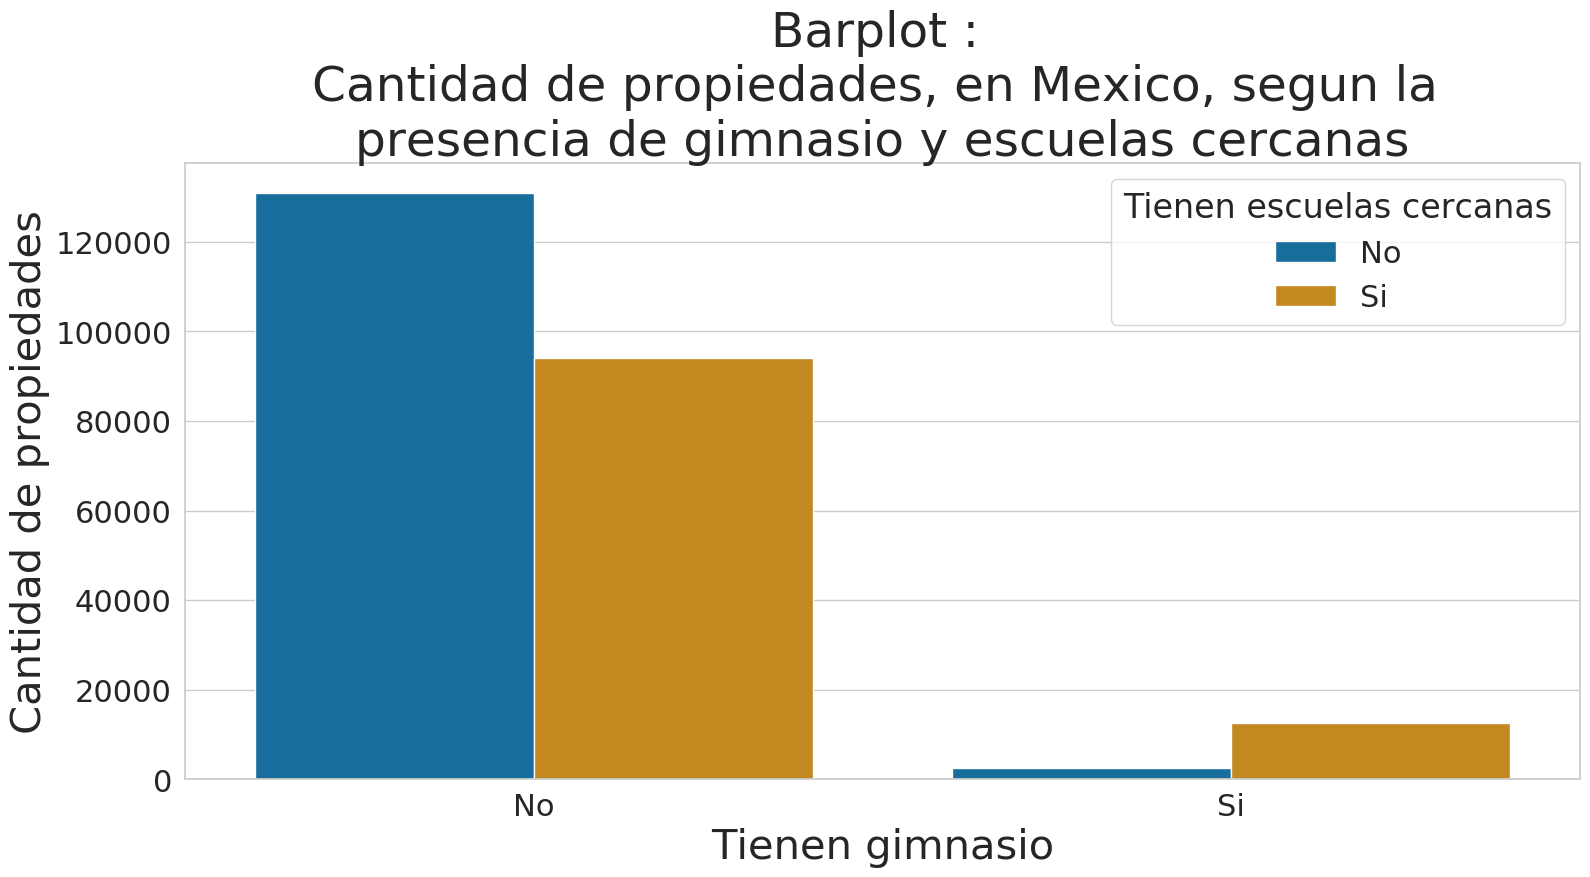

In [232]:
plot_barplot_gimnasio_escuelascercanas_cant = sns.barplot(
                                                x = 'tiene_gimnasio',
                                                y = 'cantidad_propiedades',
                                                hue = 'tiene_escuelascercanas',
                                                data = gimnasio_escuelascercanas_cant_para_plot
                                            )

common.setear_titulos_plot(
    plot_barplot_gimnasio_escuelascercanas_cant,
    'Barplot : \nCantidad de propiedades, en Mexico, segun la \npresencia de gimnasio y escuelas cercanas',
    'Tienen gimnasio',
    'Cantidad de propiedades'
)

plot_barplot_gimnasio_escuelascercanas_cant.legend(title = 'Tienen escuelas cercanas')
plt.show()

En este caso, parece haber una ligera mayor cantidad de propiedades sin gimnasio, y sin escuelas cercanas que con ellas.  
Por otro lado, para las propiedades que si tienen gimnasio, parace haber mas cantidad de ellas con escuelas cercanas. Aunque en este ultimo caso, la muestra es mucho menor que la primera. 

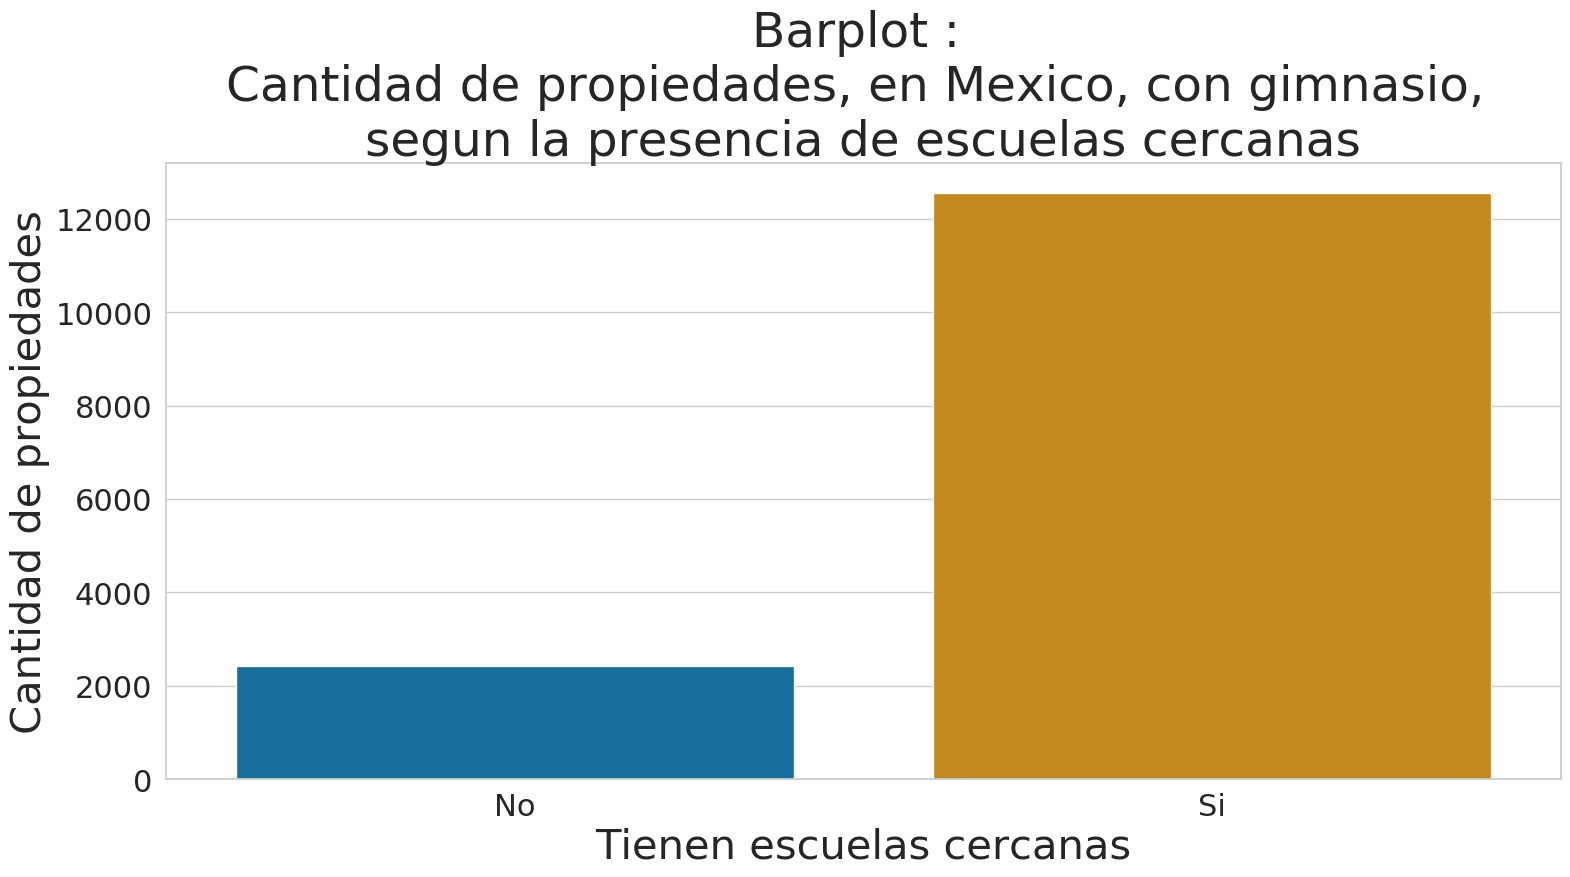

In [233]:
plot_barplot_gimnasio_true_escuelascercanas_cant = sns.barplot(
                                                x = 'tiene_escuelascercanas',
                                                y = 'cantidad_propiedades',
                                                data = gimnasio_escuelascercanas_cant_para_plot[gimnasio_escuelascercanas_cant_para_plot['tiene_gimnasio'] == 'Si']
                                            )
common.setear_titulos_plot(
    plot_barplot_gimnasio_true_escuelascercanas_cant,
    'Barplot : \nCantidad de propiedades, en Mexico, con gimnasio, \nsegun la presencia de escuelas cercanas',
    'Tienen escuelas cercanas',
    'Cantidad de propiedades'
)

plt.show()

En este acercamiento se aprecia mejor la diferencia en cantidades de propiedades, para aquellas que tienen gimnasio diferenciando entre las que tienen escuelas cercanas, y las que no.  
Las propieades con gimnasio y escuelas cercanas son mayoria por sobre las que no tienen escuelas cercanas.

In [234]:
gimnasio_escuelascercanas_pivot = gimnasio_escuelascercanas_agrupados_cant.pivot_table(index = 'tiene_gimnasio', columns = 'tiene_escuelascercanas', values = 'cantidad_propiedades')
gimnasio_escuelascercanas_pivot

tiene_escuelascercanas,False,True
tiene_gimnasio,,
False,130977,94029
True,2429,12565


In [235]:
gimnasio_escuelascercanas_pivot_para_plot = gimnasio_escuelascercanas_pivot.copy()
gimnasio_escuelascercanas_pivot_para_plot.columns = ['No', 'Si']
gimnasio_escuelascercanas_pivot_para_plot.columns.name = 'tiene_escuelascercanas'
gimnasio_escuelascercanas_pivot_para_plot.index = ['No', 'Si']
gimnasio_escuelascercanas_pivot_para_plot.index.name = 'tiene_gimnasio'
gimnasio_escuelascercanas_pivot_para_plot

tiene_escuelascercanas,No,Si
tiene_gimnasio,,
No,130977,94029
Si,2429,12565


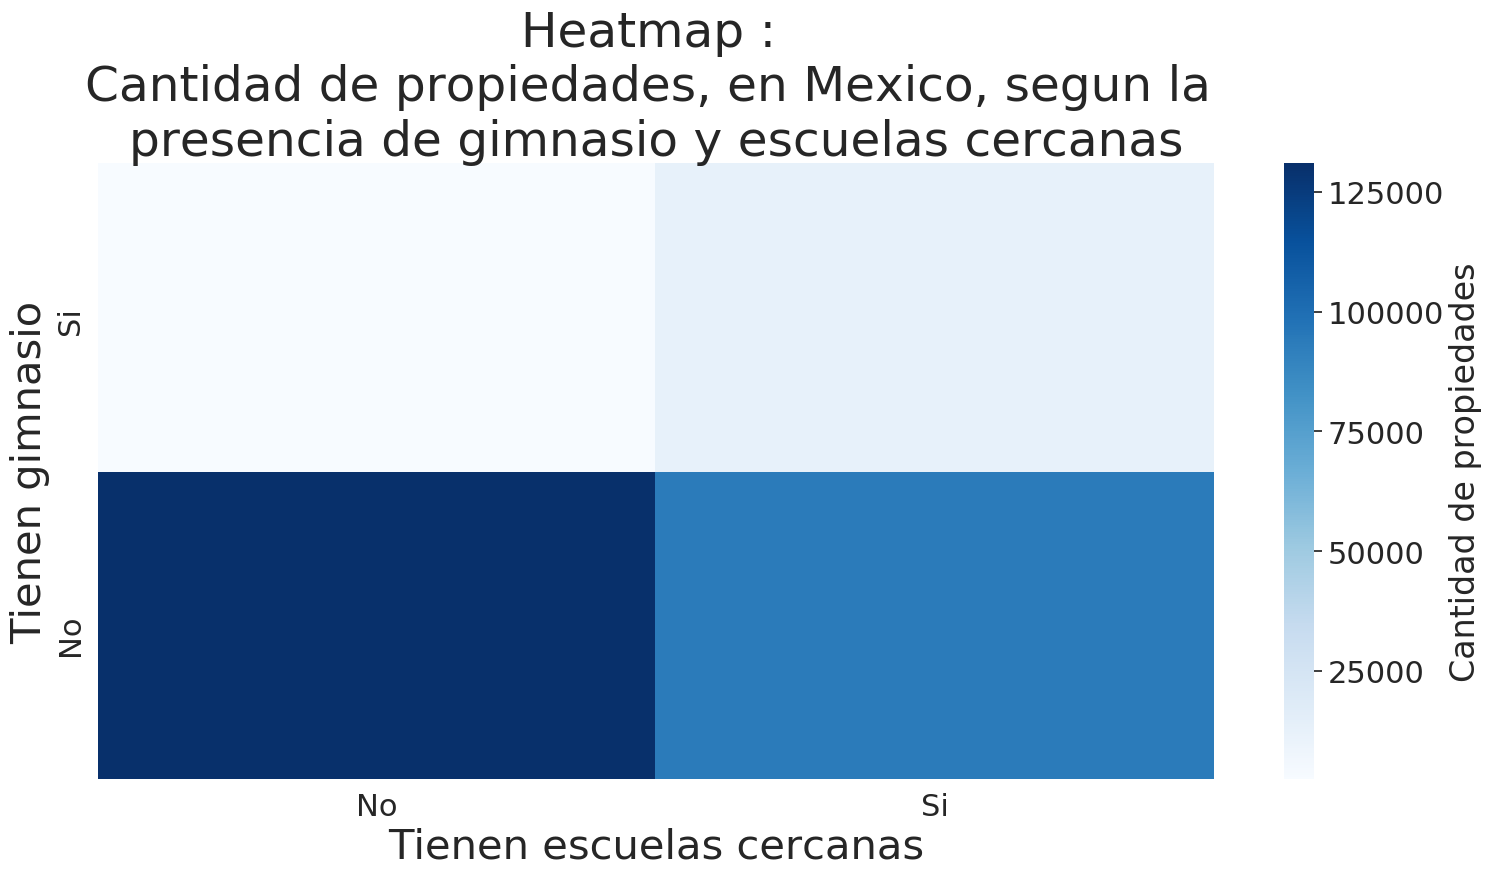

In [236]:
plot_heatmap_gimnasio_escuelascercanas_cant = sns.heatmap(
                                                    gimnasio_escuelascercanas_pivot_para_plot, 
                                                    cmap = 'Blues',
                                                    cbar_kws={'label': 'Cantidad de propiedades'}
                                                )
plot_heatmap_gimnasio_escuelascercanas_cant.invert_yaxis()

common.setear_titulos_plot(
    plot_heatmap_gimnasio_escuelascercanas_cant,
    'Heatmap : \nCantidad de propiedades, en Mexico, segun la \npresencia de gimnasio y escuelas cercanas',
    'Tienen escuelas cercanas',
    'Tienen gimnasio'
)
plt.show()

Se puede apreciar una gran presencia propiedades sin gimnasio y sin escuelas cercanas, seguido de una cantidad importante (pero menor) de propiedades sin gimnasio y con escuelas cercanas.  
En menor media, vemos que las propieades con gimnasio y escuelas cercanas dominan por sobre las que no tienen escuelas cercanas.

## Gimnasio - Precio

### ¿Cuantos datos perdemos si descartamos todos los precios NaN?

In [237]:
zona_gimnasio['precio'].isnull().sum()

0

No perdemos ningun dato.

### ¿Que es precio?

In [238]:
zona_gimnasio['precio'].unique()

array([2273000., 3600000., 1200000., ..., 1794000., 3386400.,  684338.])

In [239]:
zona_gimnasio['precio'].dtype

dtype('float32')

### ¿Como se distribuye el precio de una propiedad, en Mexico, segun la presencia de gimnasio?

In [240]:
gimnasio_agrupado_precio_estadisticas = common.agrupar_calcular_estadisticas_desagrupar(zona_gimnasio, 'gimnasio', 'precio')
gimnasio_agrupado_precio_estadisticas.rename(columns = {'gimnasio' : 'tiene_gimnasio'}, inplace = True)
gimnasio_agrupado_precio_estadisticas

,tiene_gimnasio,precio_cuantil_1,precio_median,precio_cuantil_3
0,False,"930,000.00","1,797,000.00","3,250,000.00"
1,True,"1,920,000.00","3,233,000.00","5,195,000.00"


In [241]:
zona_gimnasio_para_plot = zona_gimnasio.filter(['gimnasio', 'precio']).copy()
zona_gimnasio_para_plot = common.columna_bool_a_si_no(zona_gimnasio_para_plot, 'gimnasio')
zona_gimnasio_para_plot

,gimnasio,precio
0,No,"2,273,000.00"
1,No,"3,600,000.00"
2,No,"1,200,000.00"
3,No,"650,000.00"
4,No,"1,150,000.00"
5,No,"1,100,000.00"
6,No,"1,150,000.00"
7,No,"4,200,000.00"
8,No,"310,000.00"
9,No,"6,200,000.00"


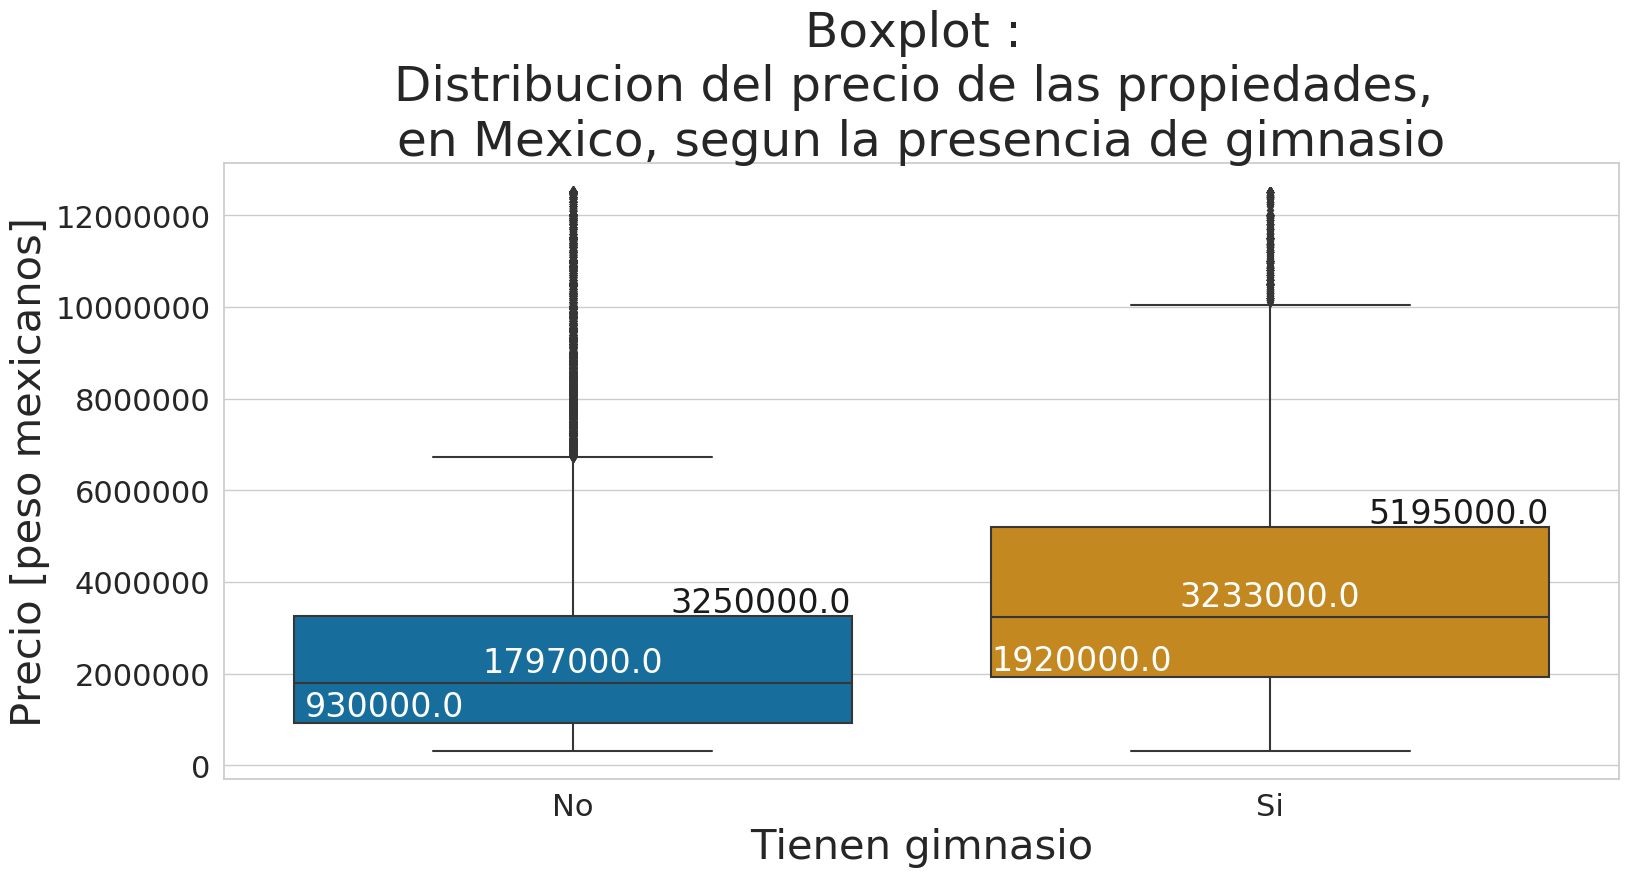

In [242]:
plot_boxplot_gimnasio_precio_estadist = sns.boxplot(
                                            x = 'gimnasio',
                                            y = 'precio',
                                            data = zona_gimnasio_para_plot
                                        )
# Titulos
common.setear_titulos_plot(
    plot_boxplot_gimnasio_precio_estadist,
    'Boxplot : \nDistribucion del precio de las propiedades, \nen Mexico, segun la presencia de gimnasio',
    'Tienen gimnasio',
    'Precio [peso mexicanos]'
)

# Elimino notacion cientifica del eje y
plot_boxplot_gimnasio_precio_estadist.ticklabel_format(style = 'plain', axis = 'y')

# Agrego cuantiles y mediana
common.agregar_serie_plot(
    plot_boxplot_gimnasio_precio_estadist,
    gimnasio_agrupado_precio_estadisticas['precio_cuantil_1'],
    gimnasio_agrupado_precio_estadisticas['precio_cuantil_1'],
    'w', 
    -0.27, 150000
)

common.agregar_serie_plot(
    plot_boxplot_gimnasio_precio_estadist,
    gimnasio_agrupado_precio_estadisticas['precio_median'],
    gimnasio_agrupado_precio_estadisticas['precio_median'],
    'w',
    0, 250000
)

common.agregar_serie_plot(
    plot_boxplot_gimnasio_precio_estadist,
    gimnasio_agrupado_precio_estadisticas['precio_cuantil_3'],
    gimnasio_agrupado_precio_estadisticas['precio_cuantil_3'],
    'k',
    0.27, 100000
)

plt.show()

Vemos que la presencia de gimnasio sube ligeramente el precio de la propiedad.